# Labeled data를 이용한 supervised Autoencoder model, training with Y

## 1. 데이터셋 불러오기

- 필요 라이브러리 불러오기

In [168]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

- 데이터셋 로드

In [169]:
label_data = pd.read_csv(r'C:\Users\pc\Desktop\04. Dataset_Molding\dataset\labeled_data.csv')
label_data

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,...,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.59,...,24.799999,27.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.60,...,24.799999,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5f8928df9c0189cc666ef213,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,...,24.799999,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5f8928f39c0189cc666ef25e,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.59,...,25.000000,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5f8928f59c0189cc666ef265,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.59,...,25.000000,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,5fa112859c0189cc66dabe34,2020-11-03 08:17:36,2020-11-03 오전 12:00:00,6,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,...,21.000000,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7992,5fa112869c0189cc66dabe42,2020-11-03 08:18:37,2020-11-03 오전 12:00:00,7,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.60,...,21.000000,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7993,5fa112879c0189cc66dabe50,2020-11-03 08:18:37,2020-11-03 오전 12:00:00,6,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,...,21.000000,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7994,5fa112bb9c0189cc66dac22a,2020-11-03 08:19:35,2020-11-03 오전 12:00:00,6,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,...,21.000000,22.299999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. EDA
데이터셋의 호기 및 제품의 데이터 종류 및 수 확인

- 호기 종류 및 해당 데이터 수 확인   
'650톤-우진2호기'만 사용

In [170]:
label_data['EQUIP_NAME'].value_counts()  #결과는 아래에서 확인 가능하다.

650톤-우진2호기    7992
650톤-우진          2
1800TON-우진       2
Name: EQUIP_NAME, dtype: int64

- 제품 종류 및 해당 데이터 수 확인   
     'CN7'과 'RG3'만 사용

In [171]:
label_data['PART_NAME'].value_counts() #결과는 아래에서 확인 가능하다.

CN7 W/S SIDE MLD'G RH        3371
CN7 W/S SIDE MLD'G LH        3365
RG3 MOLD'G W/SHLD, LH         628
RG3 MOLD'G W/SHLD, RH         628
SP2 CVR ROOF RACK CTR, RH       2
JX1 W/S SIDE MLD'G RH           2
Name: PART_NAME, dtype: int64

* 데이터 통계량 확인

In [172]:
label_data.describe()

,PART_FACT_SERIAL,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,...,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.0,7996.0,7996.0,7996.0,7996.0,7996.0,7996.0,7996.0
mean,11.248749,8.242189,3.896309,16.209505,59.900902,7.064088,653.408195,0.330320,66.054484,544.244111,...,22.145260,23.522574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,5.005191,3.107724,1.284451,1.443720,0.885680,0.136595,10.165106,14.654889,5.418233,236.351404,...,1.177468,1.356586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2.000000,1.050000,0.930000,10.920000,58.840000,5.160000,11.100000,0.000000,53.549999,4.630000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,9.000000,9.520000,4.400000,16.580000,59.520000,7.110000,653.429993,0.000000,68.250000,647.989990,...,21.400000,22.700001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,10.000000,9.560000,4.440000,16.799999,59.520000,7.120000,653.440002,0.000000,68.339996,647.989990,...,22.000000,23.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,13.000000,9.590000,4.470000,16.889999,59.560001,7.120000,653.450012,0.000000,68.489998,647.989990,...,22.900000,24.200001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,24.000000,16.309999,8.270000,21.120001,66.860001,7.180000,655.080017,655.309998,68.860001,883.700012,...,25.299999,27.799999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* column개수 확인

In [173]:
len(label_data.columns)

45

* 결측치 확인

In [174]:
label_data.isnull().sum()

_id                         0
TimeStamp                   0
PART_FACT_PLAN_DATE         0
PART_FACT_SERIAL            0
PART_NAME                   0
EQUIP_CD                    0
EQUIP_NAME                  0
PassOrFail                  0
Reason                      0
Injection_Time              0
Filling_Time                0
Plasticizing_Time           0
Cycle_Time                  0
Clamp_Close_Time            0
Cushion_Position            0
Switch_Over_Position        0
Plasticizing_Position       0
Clamp_Open_Position         0
Max_Injection_Speed         0
Max_Screw_RPM               0
Average_Screw_RPM           0
Max_Injection_Pressure      0
Max_Switch_Over_Pressure    0
Max_Back_Pressure           0
Average_Back_Pressure       0
Barrel_Temperature_1        0
Barrel_Temperature_2        0
Barrel_Temperature_3        0
Barrel_Temperature_4        0
Barrel_Temperature_5        0
Barrel_Temperature_6        0
Barrel_Temperature_7        0
Hopper_Temperature          0
Mold_Tempe

## 3. 전처리
- 필요없는 feature 제거

In [175]:
def make_input(data, machine_name ,product_name):
    machine_ = data['EQUIP_NAME'] == machine_name
    product_ = data['PART_NAME'] == product_name
    data = data[machine_ & product_]
    
    # 불필요한 categorical 데이터 삭제
    data.drop([
               '_id','TimeStamp','PART_FACT_PLAN_DATE', 'Reason',
               
               'PART_FACT_SERIAL','PART_NAME','EQUIP_CD', 'EQUIP_NAME',
               # 의미 없는 온도 데이터 제거
               'Mold_Temperature_1', 'Mold_Temperature_2', 'Mold_Temperature_5', 'Mold_Temperature_6', 'Mold_Temperature_7', 'Mold_Temperature_8', 'Mold_Temperature_9', 'Mold_Temperature_10', 'Mold_Temperature_11', 'Mold_Temperature_12'], 
              axis=1, inplace=True)
    return data

* cn7, rg3 분리 - cn7 데이터를 분석

In [176]:
machine_name = "650톤-우진2호기"
product_name = ["CN7 W/S SIDE MLD'G LH", "CN7 W/S SIDE MLD'G RH", "RG3 MOLD'G W/SHLD, LH", "RG3 MOLD'G W/SHLD, RH"]


cn7lh = make_input(label_data, machine_name, product_name[0])

cn7rh = make_input(label_data, machine_name, product_name[1])

rg3lh = make_input(label_data, machine_name, product_name[2])

rg3rh = make_input(label_data, machine_name, product_name[3])

# 
cn7 = pd.concat([cn7lh, cn7rh], ignore_index=True)
rg3 = pd.concat([rg3lh, rg3rh], ignore_index=True)

C:\Users\pc\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


* class 제거

In [177]:
cn7['PassOrFail'].value_counts()

Y    6697
N      39
Name: PassOrFail, dtype: int64

- 양품(Y)은 0으로, 불량(N)은 1로 바꾸기

In [178]:
cn7['PassOrFail'] = cn7['PassOrFail'].replace('Y', 0).replace('N', 1)

In [179]:
#PassOrFail int로 바꿔주기
cn7['PassOrFail'] = cn7['PassOrFail'].map({0:int(0), 1:int(1)})

In [180]:
#양품 불량품 개수 
# 양품
cn7_Y = cn7[cn7['PassOrFail']==0]
print('CN7의 양품 개수:', len(cn7_Y))

# 불량
cn7_N = cn7[cn7['PassOrFail']==1]
print('CN7의 불량 개수:', len(cn7_N))

CN7의 양품 개수: 6697
CN7의 불량 개수: 39


In [181]:
# 양품
cn7_Y.drop(['PassOrFail'] ,axis=1, inplace=True)

# 불량
cn7_N.drop(['PassOrFail'] ,axis=1, inplace=True)

C:\Users\pc\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [182]:
columns = cn7_Y.columns

* scaling
> 성능저하로 사용하지않음

In [183]:
#scaler = MinMaxScaler()

## 양품
#cn7_Y = scaler.fit_transform(cn7_Y)

## 불량
#cn7_N = scaler.fit_transform(cn7_N)

In [184]:
cn7_Y = pd.DataFrame(cn7_Y)
cn7_Y.columns = columns
cn7_Y.head()

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,...,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,...,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,24.799999,27.6
1,9.59,4.48,16.91,59.560001,7.13,653.419983,0.0,68.839996,647.98999,55.299999,...,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,0.0,66.900002,25.000000,27.6
2,9.58,4.46,16.90,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.599998,...,276.299988,275.299988,275.200012,271.399994,255.000000,230.000000,0.0,67.500000,25.000000,27.6
3,9.58,4.46,16.92,59.560001,7.13,653.409973,0.0,68.849998,647.98999,55.500000,...,275.799988,275.399994,275.000000,271.299988,255.000000,230.000000,0.0,67.000000,25.000000,27.6
4,9.57,4.45,16.91,59.520000,7.14,653.409973,0.0,68.830002,647.98999,55.700001,...,275.700012,274.899994,274.799988,270.799988,255.399994,230.100006,0.0,66.699997,24.799999,27.5


* 각 칼럼의 데이터 통계량확인

In [185]:
cn7_Y.describe()

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,...,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.0,6697.000000,6697.000000,6697.000000,...,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.0,6697.000000,6697.000000,6697.000000
mean,9.575707,4.443976,16.820754,59.545866,7.113505,653.440885,0.0,68.380147,644.881046,55.545916,...,275.964312,275.134627,274.856219,270.283709,254.923025,229.972063,0.0,66.668374,22.071106,23.467717
std,0.144417,0.088029,0.289453,0.359481,0.076023,0.115223,0.0,0.649670,42.292546,0.816338,...,2.308616,1.892702,1.859355,2.022469,1.137456,0.429415,0.0,2.437105,1.162081,1.355500
min,9.360000,3.350000,16.520000,58.840000,6.070000,653.409973,0.0,59.759998,69.639999,49.299999,...,244.699997,249.000000,249.600006,244.399994,239.699997,224.600006,0.0,38.500000,19.100000,20.600000
25%,9.530000,4.420000,16.629999,59.480000,7.120000,653.429993,0.0,68.320000,647.989990,55.099998,...,275.799988,275.000000,274.799988,269.700012,254.800003,229.800003,0.0,65.599998,21.200001,22.600000
50%,9.570000,4.450000,16.820000,59.520000,7.120000,653.429993,0.0,68.360001,647.989990,55.400002,...,276.100006,275.299988,275.000000,270.399994,255.000000,230.000000,0.0,67.000000,21.900000,23.299999
75%,9.600000,4.480000,16.910000,59.540001,7.120000,653.440002,0.0,68.510002,647.989990,55.900002,...,276.399994,275.500000,275.100006,271.100006,255.199997,230.100006,0.0,67.800003,22.799999,24.200001
max,11.480000,4.820000,21.100000,64.349998,7.140000,655.000000,0.0,68.860001,647.989990,64.800003,...,277.899994,276.500000,276.000000,272.399994,256.299988,230.699997,0.0,70.599998,25.299999,27.799999


* 각 칼럼 별 분포확인 및 normalization

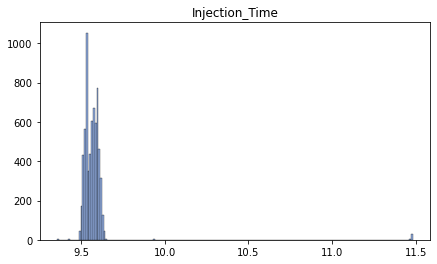

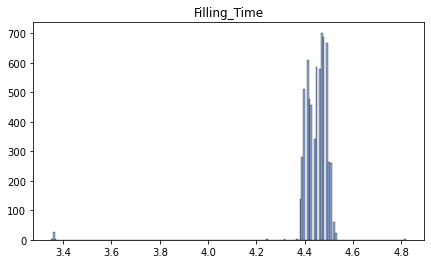

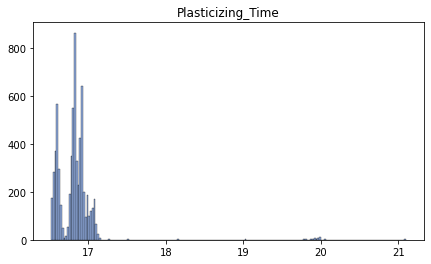

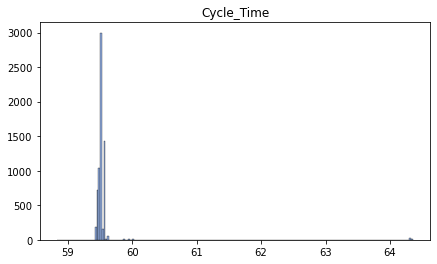

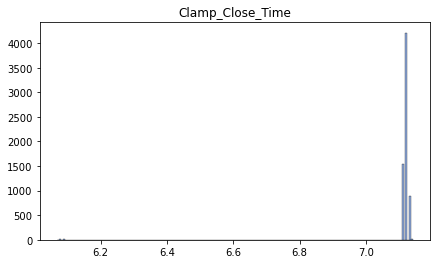

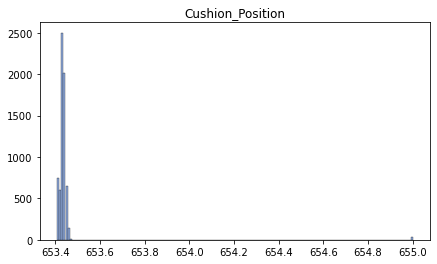

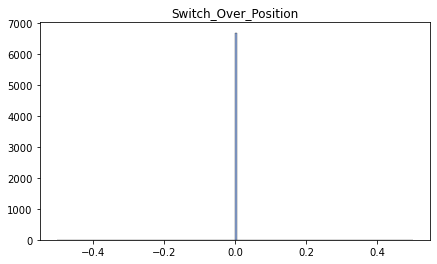

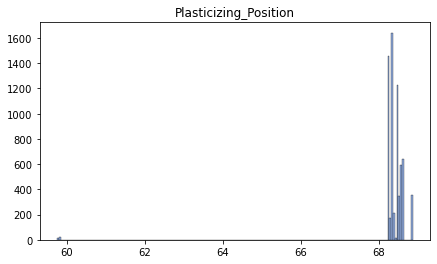

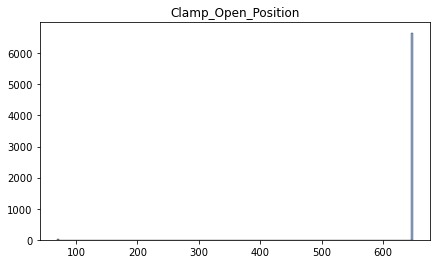

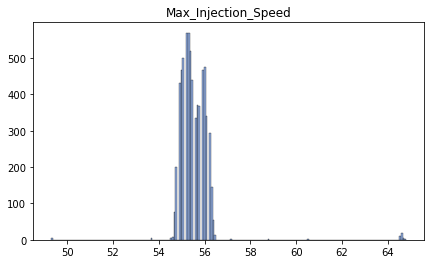

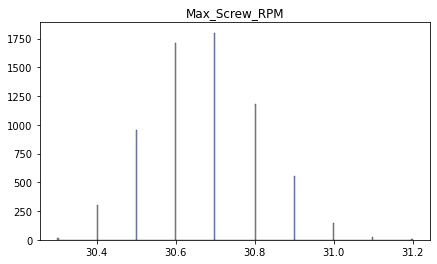

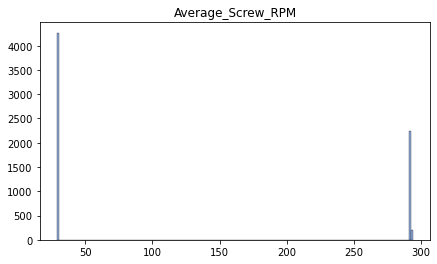

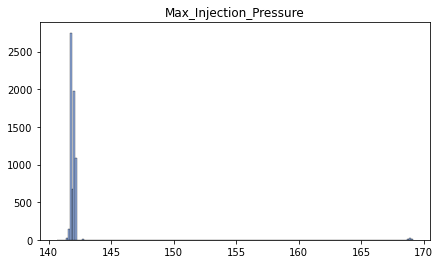

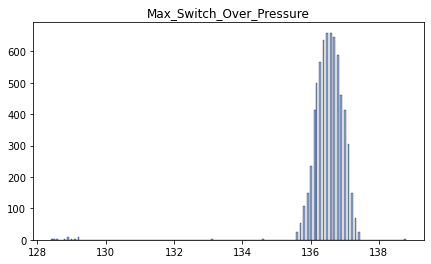

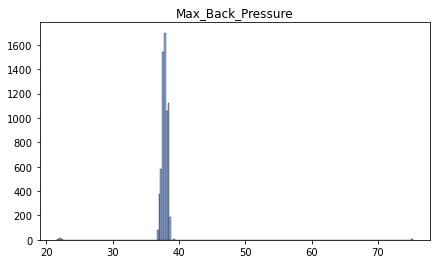

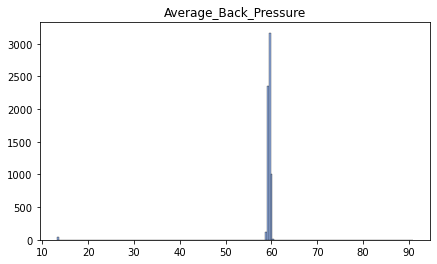

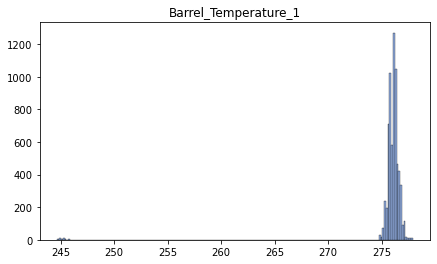

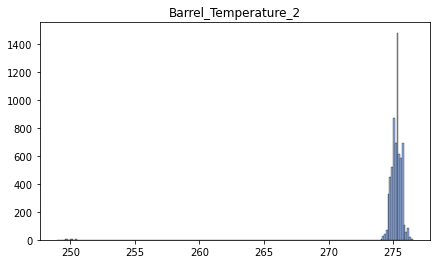

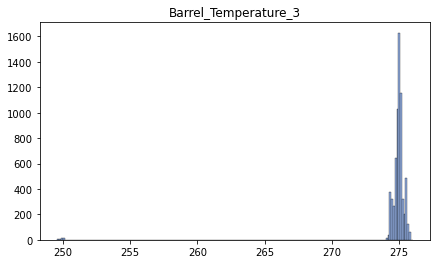

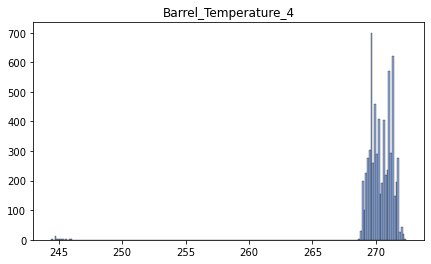

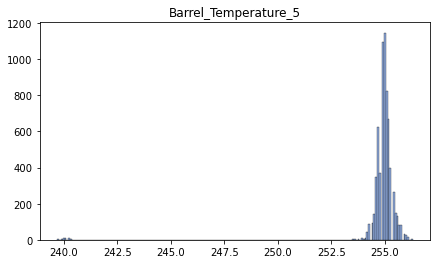

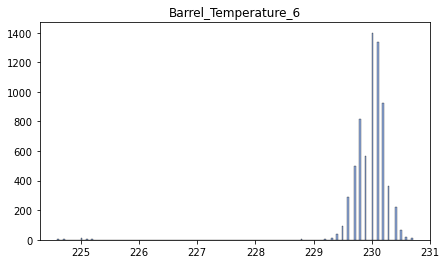

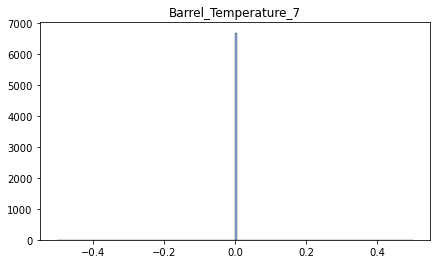

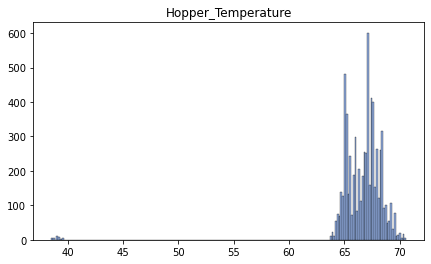

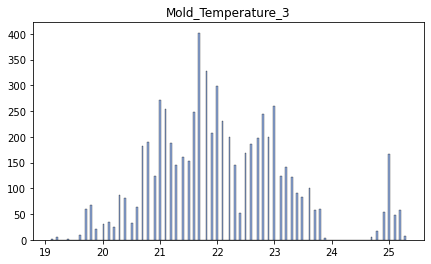

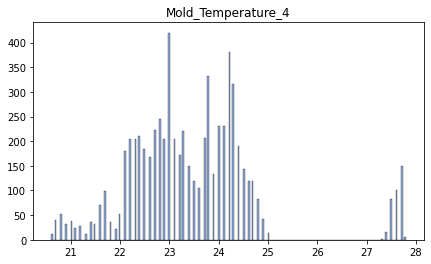

In [186]:
for index in range(len(cn7_Y.columns)):
    plt.figure(figsize=(7,4))
    plt.hist(cn7_Y.iloc[:,index], bins=200,linewidth=.3, facecolor = (144/255,171/255,221/255), edgecolor ='black')
    plt.title(cn7_Y.columns[index]) #결과는 아래에서 확인 가능하다.
    plt.show()

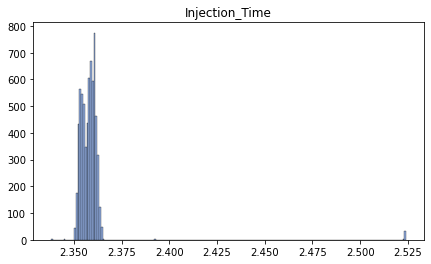

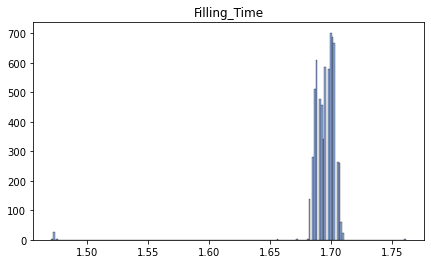

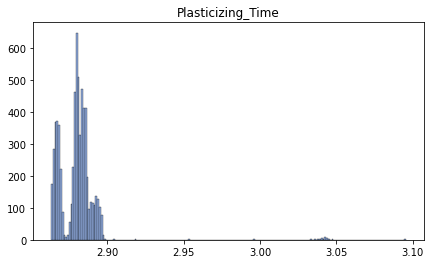

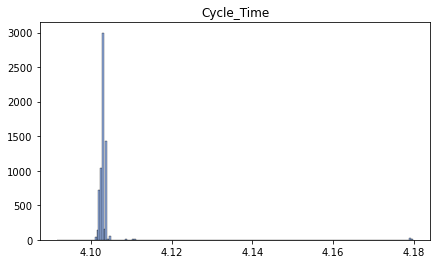

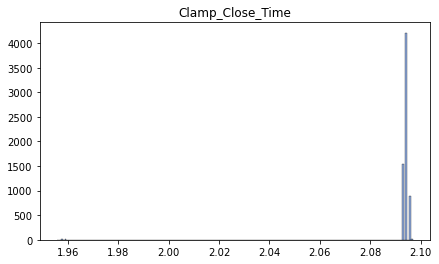

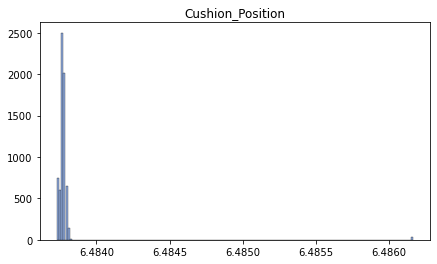

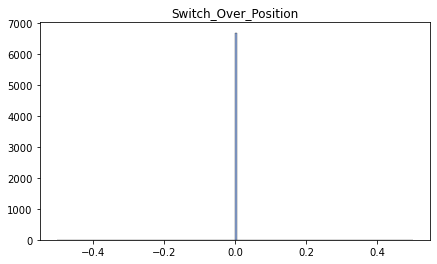

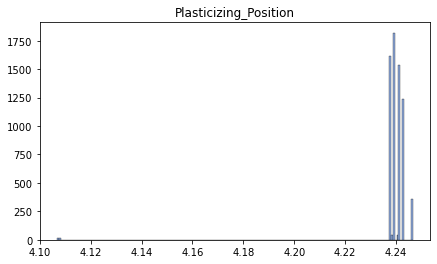

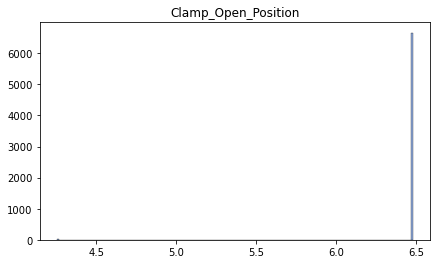

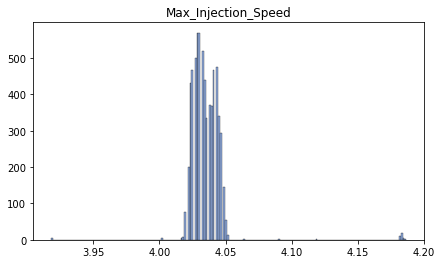

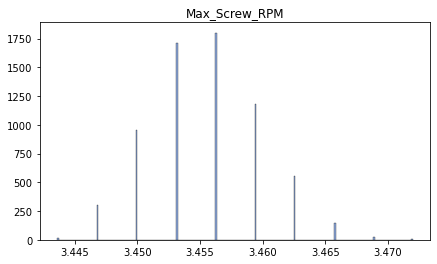

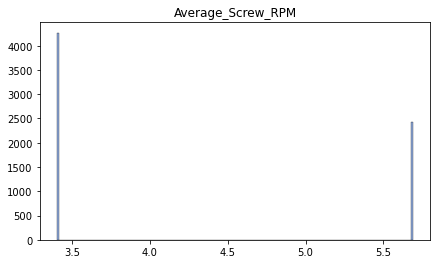

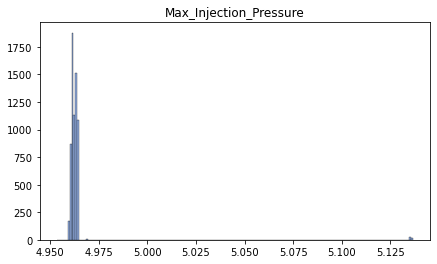

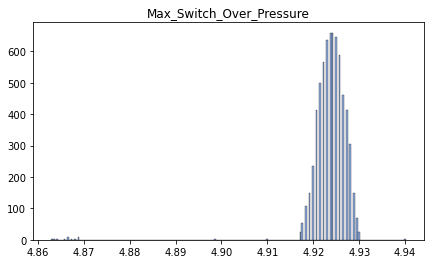

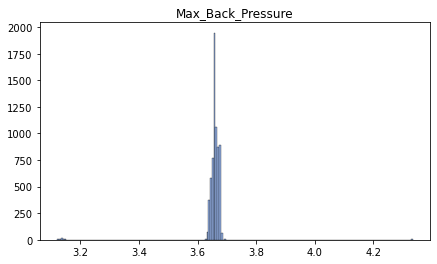

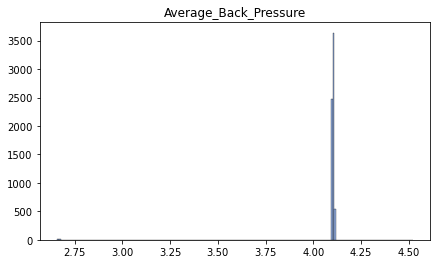

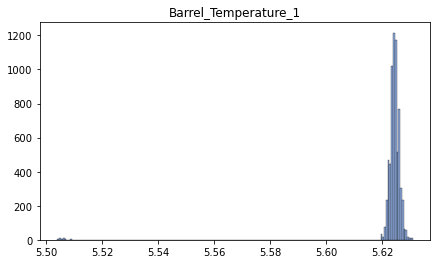

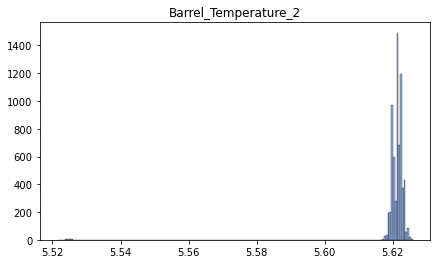

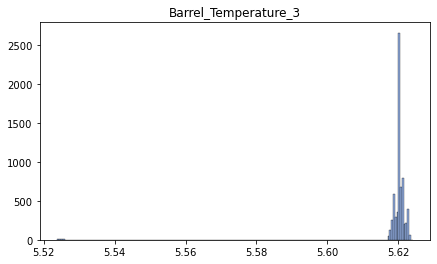

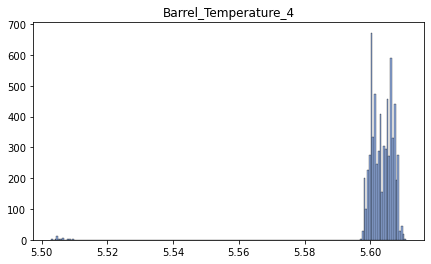

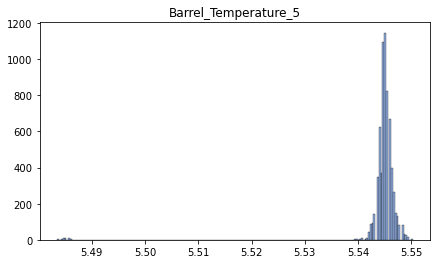

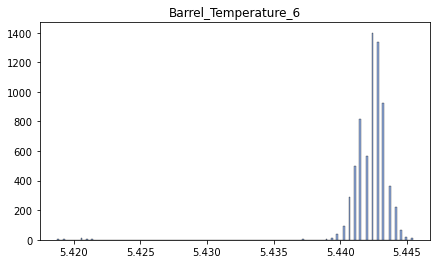

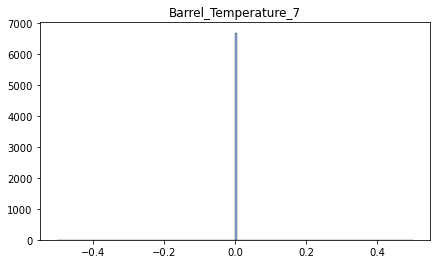

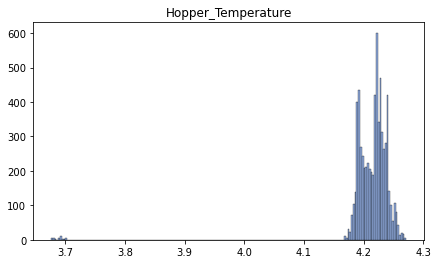

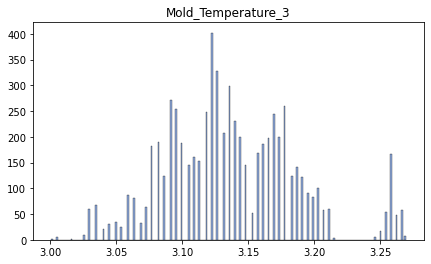

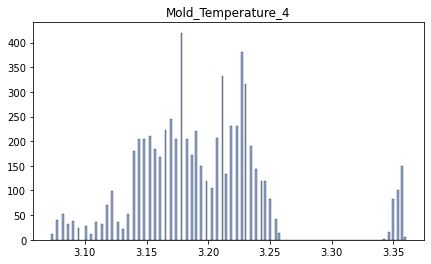

In [187]:
for index in range(len(cn7_Y.columns)):
    plt.figure(figsize=(7,4))
    plt.hist(np.log1p(cn7_Y.iloc[:,index]), bins=200,linewidth=.3, facecolor = (144/255,171/255,221/255), edgecolor ='black')
    plt.title(cn7_Y.columns[index]) #결과는 아래에서 확인 가능하다.
    plt.show()

In [188]:
cn7_Y = np.log1p(cn7_Y)
cn7_Y.head()

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,...,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,2.360854,1.701105,2.885359,4.103965,2.095561,6.483734,0.0,4.246207,6.475417,4.030695,...,5.624739,5.622211,5.621487,5.605066,5.544005,5.440251,0.0,4.222445,3.250374,3.353407
1,2.359910,1.701105,2.885359,4.103635,2.095561,6.483749,0.0,4.246207,6.475417,4.030695,...,5.625821,5.620401,5.621849,5.606170,5.544787,5.442418,0.0,4.218036,3.258097,3.353407
2,2.358965,1.697449,2.884801,4.103965,2.095561,6.483734,0.0,4.246207,6.475417,4.036009,...,5.625100,5.621487,5.621125,5.607272,5.545177,5.442418,0.0,4.226834,3.258097,3.353407
3,2.358965,1.697449,2.885917,4.103635,2.095561,6.483734,0.0,4.246350,6.475417,4.034241,...,5.623295,5.621849,5.620401,5.606904,5.545177,5.442418,0.0,4.219508,3.258097,3.353407
4,2.358020,1.695616,2.885359,4.102974,2.096790,6.483734,0.0,4.246064,6.475417,4.037774,...,5.622934,5.620038,5.619676,5.605066,5.546739,5.442851,0.0,4.215086,3.250374,3.349904


* PCA
> 성능저하로 실시하지않음

In [189]:
# from sklearn.decomposition import PCA

# pca_cn7 = PCA(n_components = 20)
# pca_rg3 = PCA(n_components = 20)

# pca_cn7.fit(cn7_Y)
# pca_rg3.fit(rg3_Y)

# cn7_Y = pca_cn7.transform(cn7_Y)
# rg3_Y = pca_rg3.transform(rg3_Y)

In [190]:
# cn7_Y = pd.DataFrame(cn7_Y)

In [191]:
# rg3_Y = pd.DataFrame(rg3_Y)

## 4. 전처리된 데이터 특성 분석

In [192]:
cn7_Y.describe()

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,...,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.0,6697.000000,6697.000000,6697.000000,...,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.0,6697.000000,6697.000000,6697.000000
mean,2.358475,1.694362,2.880242,4.103384,2.093482,6.483781,0.0,4.239553,6.463495,4.034955,...,5.623851,5.620864,5.619856,5.603136,5.544866,5.442295,0.0,4.213793,3.137331,3.195873
std,0.012643,0.017694,0.015341,0.005724,0.010013,0.000176,0.0,0.009956,0.162181,0.013781,...,0.008817,0.007174,0.007053,0.007763,0.004567,0.001874,0.0,0.043333,0.049848,0.053991
min,2.337952,1.470176,2.863343,4.091674,1.955861,6.483734,0.0,4.106932,4.257597,3.918005,...,5.504111,5.521461,5.523858,5.502890,5.483551,5.418764,0.0,3.676301,3.000720,3.072693
25%,2.354228,1.690096,2.869602,4.102313,2.094330,6.483765,0.0,4.238733,6.475417,4.027136,...,5.623295,5.620401,5.619676,5.601011,5.544396,5.441552,0.0,4.198705,3.100092,3.161247
50%,2.358020,1.695616,2.880321,4.102974,2.094330,6.483765,0.0,4.239310,6.475417,4.032469,...,5.624378,5.621487,5.620401,5.603594,5.545177,5.442418,0.0,4.219508,3.131137,3.190476
75%,2.360854,1.701105,2.885359,4.103304,2.094330,6.483780,0.0,4.241471,6.475417,4.041295,...,5.625460,5.622211,5.620763,5.606170,5.545958,5.442851,0.0,4.231204,3.169686,3.226844
max,2.524127,1.761300,3.095578,4.179757,2.096790,6.486161,0.0,4.246493,6.475417,4.186620,...,5.630853,5.625821,5.624018,5.610936,5.550243,5.445443,0.0,4.271095,3.269569,3.360375


- 4-2. CN7 제품/corr 함수를 통한 변수 간 상관관계 파악 가이드

## 5. Training, Test data 분리

-  5-1. 양품 및 불량 데이터 파악

In [193]:
cn7_train_Y = cn7_Y[:4000]
cn7_test_Y = cn7_Y[4000:]
cn7_test_N = cn7_N

print('CN7의 양품 학습 데이터셋 개수:', len(cn7_train_Y))
print('CN7의 양품 검증 데이터셋 개수:', len(cn7_test_Y))
print('CN7의 불량 검증 데이터셋 개수:', len(cn7_test_N))

CN7의 양품 학습 데이터셋 개수: 4000
CN7의 양품 검증 데이터셋 개수: 2697
CN7의 불량 검증 데이터셋 개수: 39


## 6. 오토인코더 모델 생성

In [194]:
dropout_encoder = Sequential([
    Dropout(0.3),
    Dense(15, activation="relu"),
    Dense(5, activation="relu")
])

dropout_decoder = Sequential([
    Dense(15, activation="relu", input_shape=[5]),
    Dense(cn7_train_Y.shape[1], activation="relu"),
])

dropout_AE = Sequential([dropout_encoder, dropout_decoder])

In [195]:
# 손실함수 옵티마이저 정의
dropout_AE.compile(loss="mse", optimizer=Adam(lr=0.01), metrics=['accuracy'])
# 모델 훈련
history = dropout_AE.fit(cn7_train_Y, cn7_train_Y, batch_size=30, epochs=30, validation_split=0.2, callbacks=[EarlyStopping(monitor="val_loss", patience=7, mode="min")])

Epoch 1/30

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

107/107 [==============================] - 1s 5ms/step - loss: 5.2650 - accuracy: 0.4366 - val_loss: 4.5663 - val_accuracy: 1.0000
Epoch 2/30
107/107 [==============================] - 0s 3ms/step - loss: 4.2829 - accuracy: 0.6078 - val_loss: 4.3971 - val_accuracy: 1.0000
Epoch 3/30
107/107 [==============================] - 0s 3ms/step - loss: 4.2303 - accuracy: 0.6003 - val_loss: 4.3906 - val_accuracy: 0.0000e+00
Epoch 4/30
107/107 [==============================] - 0s 3ms/step - loss: 4.20

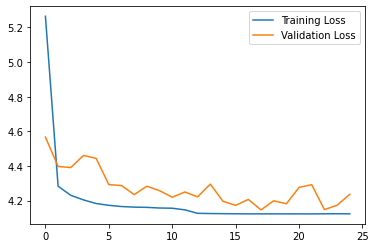

In [196]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
# plt.savefig('loss.png', dpi=300)
plt.show()

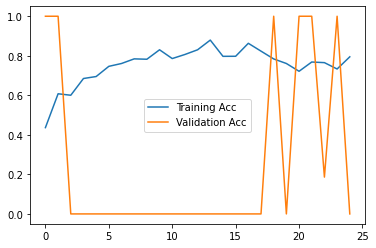

In [197]:
plt.plot(history.history["accuracy"], label="Training Acc")
plt.plot(history.history["val_accuracy"], label="Validation Acc")
plt.legend()
plt.savefig('acc.png', dpi=300)
plt.show()

## 7. 임계값 정의 및 예측값과 복원 오차 확인

- 7-1. 임계값 정의 가이드

In [198]:
# 학습 데이터의 예측값

cn7_train_pred = dropout_AE.predict(cn7_train_Y)
# 학습 데이터의 복원 오차 (예측값 – 실제 값)
cn7_train_loss = np.mean(np.square(cn7_train_pred - cn7_train_Y), axis=1)

# 임계치
threshold = np.mean(cn7_train_loss) # + np.std(cn7_train_loss)

print("복원 오류 임계치: ", threshold) #결과는 아래에서 확인 가능하다.

복원 오류 임계치:  4.184732585154144


- 7-2. 데이터 각각의 예측값과 복원 오차 확인 가이드

    - 양품

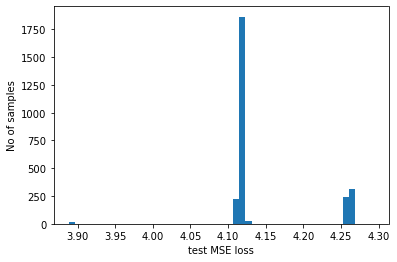

불량 개수:  561


In [199]:
# 평가 데이터의 양품

# 예측값
cn7_predict_Y = dropout_AE.predict(cn7_test_Y)

# 양품 평가 데이터의 복원 오차 (예측값 – 실제 값)
cn7_test_Y_mse= np.mean(np.square(cn7_predict_Y - cn7_test_Y), axis=1)

# 시각화
plt.hist(cn7_test_Y_mse, bins=50)
plt.xlabel("test MSE loss")
plt.ylabel("No of samples")
plt.show() 

# 불량으로 판단한 데이터 확인
cv7_test_Y_anomalies = cn7_test_Y_mse > threshold
print("불량 개수: ", np.sum(cv7_test_Y_anomalies)) #결과는 아래에서 확인 가능하다.

    - 불량

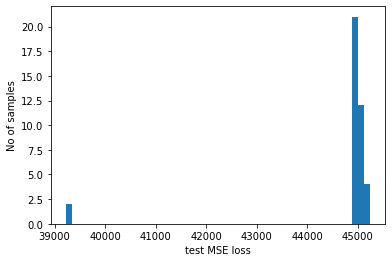

불량 개수:  39


In [200]:
# 평가 데이터의 불량

# 예측값
cn7_predict_N = dropout_AE.predict(cn7_test_N)
# 불량 평가 데이터의 복원 오차 (예측값 – 실제 값)
cn7_test_N_mse = np.mean(np.square(cn7_predict_N - cn7_test_N), axis=1)

# 시각화
plt.hist(cn7_test_N_mse, bins=50)
plt.xlabel("test MSE loss")
plt.ylabel("No of samples")
plt.show() 

# 불량으로 판단한 데이터 확인
cv7_test_N_anomalies = cn7_test_N_mse > threshold
print("불량 개수: ", np.sum(cv7_test_N_anomalies)) #결과는 아래에서 확인 가능하다.

## 8. 결과

In [201]:
cn7_true = np.concatenate([np.zeros(len(cv7_test_Y_anomalies)), np.ones(len(cv7_test_N_anomalies))])

In [202]:
cn7_prediction = np.concatenate([cv7_test_Y_anomalies, cv7_test_N_anomalies])

In [203]:
from sklearn.metrics import confusion_matrix
confusion_matrix(cn7_true, cn7_prediction)  #결과는 아래에서 확인 가능하다.

array([[2136,  561],
       [   0,   39]], dtype=int64)

In [204]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1],'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.aragne(start, end, 0.1), 2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()

In [205]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("정확도:", accuracy_score(cn7_true, cn7_prediction))
print("정밀도:", precision_score(cn7_true, cn7_prediction))
print("재현율:", recall_score(cn7_true, cn7_prediction))
print("F1:",f1_score(cn7_true, cn7_prediction)) #결과는 아래에서 확인 가능하다.
#roc_curve_plot(cn7_true, cn7_prediction[:, 1])
print("ROC:", roc_auc_score(cn7_true, cn7_prediction))

정확도: 0.7949561403508771
정밀도: 0.065
재현율: 1.0
F1: 0.12206572769953053
ROC: 0.8959955506117908
